In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')


data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_52430/1559749542.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### Load mobility data files

### Load/Clean Simple Heatwave Data

In [3]:
#heatwave_control = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/heatwave_control/heatwave_control_90_v2.csv')
heatwave_control = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_heatwave_control_90.csv')

In [4]:
len(heatwave_control['location'].unique())

722

In [5]:
from datetime import timedelta
from dateutil.parser import parse

In [6]:
heatwave_control['control_day'] = [parse(x) for x in heatwave_control['control_day']]
heatwave_control['datetime'] = [parse(x) for x in heatwave_control['datetime']]

In [7]:
(heatwave_control['datetime'] - heatwave_control['control_day']).describe()

count                          7667
mean     12 days 07:48:47.611842963
std       6 days 20:02:41.460180064
min              -28 days +00:00:00
25%                 7 days 00:00:00
50%                14 days 00:00:00
75%                14 days 00:00:00
max                56 days 00:00:00
dtype: object

In [8]:
heatwave_control['diff'] = (heatwave_control['datetime'] - heatwave_control['control_day'])

In [9]:
temp = pd.DataFrame(heatwave_control['diff'].value_counts()).sort_index()

In [10]:
temp.columns = ['Number of Instances']

Text(0, 0.5, 'Heat and Control Difference')

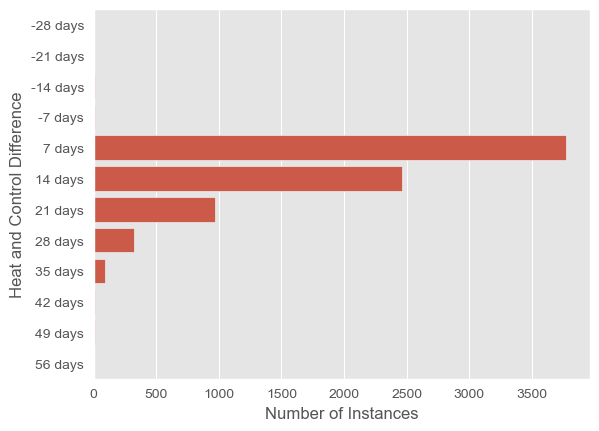

In [13]:
sns.barplot(temp, y=temp.index, x='Number of Instances')
plt.ylabel("Heat and Control Difference")

### Merge Mobility with Heat Data

In [14]:
mobility = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/google_clean.csv')  

In [15]:
mobility.drop_duplicates(['location', 'date'], inplace=True)

In [16]:
mobility['date'] = pd.to_datetime(mobility['date'])

In [17]:
mobility_heat = mobility.merge(heatwave_control[['control_day', 'thi', 'location', 'datetime', 'heat_ID']], left_on=['location', 'date'], right_on=['location', 'datetime'])

In [18]:
#merge mobility data associated with control dates
mobility_heat = mobility_heat.merge(mobility[['location', 'date', 'retail_rec', 'grocery_pharm', 'parks', 'transit', 'workplace', 'residential']], left_on=['location', 'control_day'], right_on=['location', 'date'], suffixes=['_heat', '_control'])

In [19]:
#calculate differences between heat and control 
mobility_heat['retail_rec_difference'] = mobility_heat['retail_rec_heat'] - mobility_heat['retail_rec_control']
mobility_heat['grocery_pharm_difference'] = mobility_heat['grocery_pharm_heat'] - mobility_heat['grocery_pharm_control']
mobility_heat['parks_difference'] = mobility_heat['parks_heat'] - mobility_heat['parks_control']
mobility_heat['transit_difference'] = mobility_heat['transit_heat'] - mobility_heat['transit_control']
mobility_heat['workplace_difference'] = mobility_heat['workplace_heat'] - mobility_heat['workplace_control']
mobility_heat['residential_difference'] = mobility_heat['residential_heat'] - mobility_heat['residential_control']

In [20]:
mobility_heat['day_of_week'] = [x.day_of_week for x in mobility_heat['date_heat']]
mobility_heat['weekend'] = [1 if x in [5,6] else 0 for x in mobility_heat['day_of_week']]

In [21]:
mobility_heat.reset_index(drop=True,inplace=True)

In [22]:
mobility_heat

,Unnamed: 0,adm2,adm1,date_heat,retail_rec_heat,grocery_pharm_heat,parks_heat,transit_heat,workplace_heat,residential_heat,...,workplace_control,residential_control,retail_rec_difference,grocery_pharm_difference,parks_difference,transit_difference,workplace_difference,residential_difference,day_of_week,weekend
0,176,Chamba,Himachal Pradesh,2022-06-26,90.0,NaN,294.0,86.0,53.0,17.0,...,62.0,16.0,0.0,NaN,19.0,1.0,-9.0,1.0,6,1
1,177,Chamba,Himachal Pradesh,2022-06-27,53.0,NaN,301.0,69.0,66.0,17.0,...,75.0,15.0,-11.0,NaN,5.0,0.0,-9.0,2.0,0,0
2,184,Chamba,Himachal Pradesh,2022-07-04,45.0,NaN,221.0,66.0,60.0,16.0,...,75.0,15.0,-19.0,NaN,-75.0,-3.0,-15.0,1.0,0,0
3,191,Chamba,Himachal Pradesh,2022-07-11,36.0,NaN,189.0,49.0,57.0,16.0,...,75.0,15.0,-28.0,NaN,-107.0,-20.0,-18.0,1.0,0,0
4,198,Chamba,Himachal Pradesh,2022-07-18,35.0,NaN,186.0,58.0,58.0,17.0,...,75.0,15.0,-29.0,NaN,-110.0,-11.0,-17.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,181145,Warangal,Telangana,2022-05-17,5.0,88.0,64.0,18.0,20.0,19.0,...,24.0,19.0,0.0,-2.0,-2.0,3.0,-4.0,0.0,1,0
6314,181163,Warangal,Telangana,2022-06-04,-2.0,83.0,57.0,20.0,24.0,18.0,...,23.0,18.0,0.0,5.0,-4.0,1.0,1.0,0.0,5,1
6315,181164,Warangal,Telangana,2022-06-05,0.0,85.0,50.0,23.0,49.0,17.0,...,48.0,16.0,-2.0,-1.0,-5.0,-4.0,1.0,1.0,6,1
6316,181168,Warangal,Telangana,2022-06-09,4.0,88.0,63.0,24.0,23.0,18.0,...,25.0,18.0,1.0,-5.0,6.0,-1.0,-2.0,0.0,3,0


In [23]:
mobility_heat.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_mobility_heat_clean_90.csv')

### Test difference in means and temperature-mobility relationship